In [46]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statistics
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

data = pd.read_csv('titanic_train.csv')

In [2]:
data = data.drop(labels = ['PassengerId', 'Name', 'Cabin', 'Ticket', 'Age', 
                           'Parch', 'Embarked', 'SibSp'], axis = 1)

In [3]:
data = pd.get_dummies(data, columns = ['Sex'])
data.fillna(value = 0.0, inplace = True)

In [4]:
y = data['Survived']
x = data.drop('Survived', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [6]:
#lr = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
lr = list(range(5, 100, 5))
for a in range(len(lr)):
    lr[a] = lr[a] / 100

as_train = 0
as_train2 = 0
as_val = 0
as_val2 = 0
i_train = 0
lr_train = 0
i_val = 0
lr_val = 0

for i in range(10, 30):
    for rate in lr:
        gb = GradientBoostingClassifier(n_estimators = i, learning_rate = rate, max_depth = 2, random_state = 0)
        gb = gb.fit(x_train, y_train)
        
        if gb.score(x_train, y_train) > as_train:
            as_train = gb.score(x_train, y_train)
            as_val2 = gb.score(x_test, y_test)
            i_train = i
            lr_train = rate
            
        if gb.score(x_test, y_test) > as_val:
            as_val = gb.score(x_test, y_test)
            as_train2 = gb.score(x_train, y_train)
            i_val = i
            lr_val = rate
        
        """
        print('Learning Rate: ', rate)
        print('Estimators: ', i)
        print('Accuracy Score (training): {0:.3f}'.format(gb.score(x_train, y_train)))
        print('Accuracy Score (validation): {0:.3f}'.format(gb.score(x_test, y_test)))
        """

In [7]:
print('Accuracy Score (training): {0:.3f}'.format(as_train))
print('Accuracy Score (validation): {0:.3f}'.format(as_val2))
print('Learning Rate: ', lr_train)
print('Estimators: ', i_train)

Accuracy Score (training): 0.894
Accuracy Score (validation): 0.787
Learning Rate:  0.85
Estimators:  29


In [8]:
print('Accuracy Score (validation): {0:.3f}'.format(as_val))
print('Accuracy Score (training): {0:.3f}'.format(as_train2))
print('Learning Rate: ', lr_val)
print('Estimators: ', i_val)

Accuracy Score (validation): 0.810
Accuracy Score (training): 0.876
Learning Rate:  0.55
Estimators:  26


In [9]:
"""
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
"""

'\nfrom sklearn.metrics import classification_report, confusion_matrix\n\nprint(confusion_matrix(y_test, y_pred))\nprint(classification_report(y_test, y_pred))\n'

In [10]:
gb1 = GradientBoostingClassifier(n_estimators = 29, learning_rate = 0.85, max_depth = 2, random_state = 0)
gb1 = gb1.fit(x_train, y_train)
y_pred = gb1.predict(x_test)

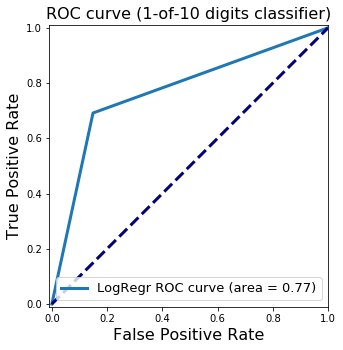

In [11]:
# ROC curve
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

%matplotlib inline
plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [12]:
gb2 = GradientBoostingClassifier(n_estimators = 26, learning_rate = 0.55, max_depth = 2, random_state = 0)
gb2 = gb2.fit(x_train, y_train)
y_pred = gb2.predict(x_test)

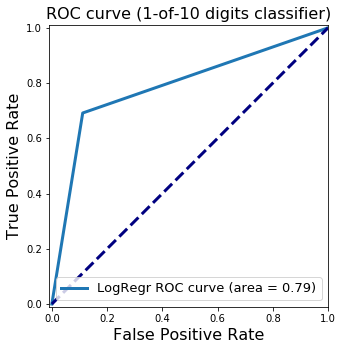

In [13]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [14]:
from sklearn.neural_network import MLPClassifier

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 12)

In [60]:
score_train = []
score_validation = []
index = []

for i in list(range(40)):
    print(i + 1)
    slp = MLPClassifier(solver='adam',
                     hidden_layer_sizes=(i+1,),
                     random_state=1,
                     learning_rate='constant',
                     learning_rate_init=0.01,
                     max_iter=400,
                     activation='logistic',
                     momentum=0.1,
                     verbose=True,
                     early_stopping=True,
                     validation_fraction=0.3,
                     tol=0.001)

    slp.fit(x_train, y_train)
    pred = slp.predict(x_test)
    
    score_train.append(slp.score(x_train, y_train))
    score_validation.append(slp.score(x_test, y_test))

1
Iteration 1, loss = 0.66941380
Validation score: 0.620321
Iteration 2, loss = 0.66536652
Validation score: 0.620321
Iteration 3, loss = 0.66196520
Validation score: 0.620321
Iteration 4, loss = 0.65895735
Validation score: 0.620321
Iteration 5, loss = 0.65631994
Validation score: 0.620321
Iteration 6, loss = 0.65407188
Validation score: 0.620321
Iteration 7, loss = 0.65187212
Validation score: 0.620321
Iteration 8, loss = 0.64979436
Validation score: 0.620321
Iteration 9, loss = 0.64780307
Validation score: 0.620321
Iteration 10, loss = 0.64594908
Validation score: 0.620321
Iteration 11, loss = 0.64401994
Validation score: 0.620321
Iteration 12, loss = 0.64202621
Validation score: 0.620321
Validation score did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
2
Iteration 1, loss = 0.66732132
Validation score: 0.620321
Iteration 2, loss = 0.66511252
Validation score: 0.620321
Iteration 3, loss = 0.66336287
Validation score: 0.620321
Iteration 4, loss = 0.66184482

Iteration 13, loss = 0.56315595
Validation score: 0.711230
Iteration 14, loss = 0.55298225
Validation score: 0.791444
Iteration 15, loss = 0.54313657
Validation score: 0.791444
Iteration 16, loss = 0.53328833
Validation score: 0.791444
Iteration 17, loss = 0.52389175
Validation score: 0.791444
Iteration 18, loss = 0.51464135
Validation score: 0.786096
Iteration 19, loss = 0.50572206
Validation score: 0.823529
Iteration 20, loss = 0.49768321
Validation score: 0.823529
Iteration 21, loss = 0.49066504
Validation score: 0.823529
Iteration 22, loss = 0.48386010
Validation score: 0.823529
Iteration 23, loss = 0.47788524
Validation score: 0.823529
Iteration 24, loss = 0.47353159
Validation score: 0.823529
Iteration 25, loss = 0.46997291
Validation score: 0.823529
Iteration 26, loss = 0.46701992
Validation score: 0.828877
Iteration 27, loss = 0.46482220
Validation score: 0.828877
Iteration 28, loss = 0.46293159
Validation score: 0.828877
Iteration 29, loss = 0.46100269
Validation score: 0.8288

Iteration 4, loss = 0.63660073
Validation score: 0.620321
Iteration 5, loss = 0.63148081
Validation score: 0.620321
Iteration 6, loss = 0.62241083
Validation score: 0.620321
Iteration 7, loss = 0.61109605
Validation score: 0.620321
Iteration 8, loss = 0.60180673
Validation score: 0.620321
Iteration 9, loss = 0.59537969
Validation score: 0.684492
Iteration 10, loss = 0.58789115
Validation score: 0.764706
Iteration 11, loss = 0.57769987
Validation score: 0.764706
Iteration 12, loss = 0.56606962
Validation score: 0.764706
Iteration 13, loss = 0.55519129
Validation score: 0.764706
Iteration 14, loss = 0.54369428
Validation score: 0.764706
Iteration 15, loss = 0.53290416
Validation score: 0.764706
Iteration 16, loss = 0.52198035
Validation score: 0.764706
Iteration 17, loss = 0.51149090
Validation score: 0.791444
Iteration 18, loss = 0.50167262
Validation score: 0.791444
Iteration 19, loss = 0.49187479
Validation score: 0.791444
Iteration 20, loss = 0.48354403
Validation score: 0.791444
Ite

Iteration 23, loss = 0.44902479
Validation score: 0.802139
Iteration 24, loss = 0.44560057
Validation score: 0.802139
Iteration 25, loss = 0.44387302
Validation score: 0.802139
Validation score did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
25
Iteration 1, loss = 0.66275981
Validation score: 0.620321
Iteration 2, loss = 0.64924564
Validation score: 0.620321
Iteration 3, loss = 0.64255447
Validation score: 0.620321
Iteration 4, loss = 0.62776139
Validation score: 0.620321
Iteration 5, loss = 0.61481193
Validation score: 0.620321
Iteration 6, loss = 0.60751562
Validation score: 0.620321
Iteration 7, loss = 0.59755553
Validation score: 0.620321
Iteration 8, loss = 0.58228444
Validation score: 0.625668
Iteration 9, loss = 0.56550893
Validation score: 0.780749
Iteration 10, loss = 0.55235967
Validation score: 0.775401
Iteration 11, loss = 0.53791861
Validation score: 0.786096
Iteration 12, loss = 0.52332517
Validation score: 0.786096
Iteration 13, loss = 0.51005

Iteration 20, loss = 0.46285690
Validation score: 0.807487
Iteration 21, loss = 0.45956330
Validation score: 0.807487
Iteration 22, loss = 0.45693756
Validation score: 0.807487
Validation score did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
31
Iteration 1, loss = 0.65928597
Validation score: 0.620321
Iteration 2, loss = 0.66433915
Validation score: 0.620321
Iteration 3, loss = 0.65326279
Validation score: 0.620321
Iteration 4, loss = 0.63469239
Validation score: 0.620321
Iteration 5, loss = 0.62503296
Validation score: 0.620321
Iteration 6, loss = 0.61739150
Validation score: 0.721925
Iteration 7, loss = 0.60527661
Validation score: 0.695187
Iteration 8, loss = 0.59051632
Validation score: 0.711230
Iteration 9, loss = 0.57907751
Validation score: 0.721925
Iteration 10, loss = 0.56584274
Validation score: 0.721925
Iteration 11, loss = 0.55239590
Validation score: 0.818182
Iteration 12, loss = 0.53742344
Validation score: 0.812834
Iteration 13, loss = 0.52234

Iteration 4, loss = 0.64273713
Validation score: 0.620321
Iteration 5, loss = 0.62367912
Validation score: 0.620321
Iteration 6, loss = 0.60818207
Validation score: 0.625668
Iteration 7, loss = 0.59554298
Validation score: 0.711230
Iteration 8, loss = 0.58487903
Validation score: 0.818182
Iteration 9, loss = 0.57220080
Validation score: 0.818182
Iteration 10, loss = 0.55866531
Validation score: 0.818182
Iteration 11, loss = 0.54512278
Validation score: 0.818182
Iteration 12, loss = 0.53205784
Validation score: 0.812834
Iteration 13, loss = 0.51973030
Validation score: 0.834225
Iteration 14, loss = 0.50819985
Validation score: 0.834225
Iteration 15, loss = 0.49830534
Validation score: 0.834225
Iteration 16, loss = 0.48766119
Validation score: 0.834225
Iteration 17, loss = 0.48132059
Validation score: 0.834225
Iteration 18, loss = 0.47566122
Validation score: 0.834225
Iteration 19, loss = 0.47040070
Validation score: 0.834225
Iteration 20, loss = 0.46750277
Validation score: 0.834225
Ite

In [64]:
print(score_train)

[0.622792937399679, 0.622792937399679, 0.622792937399679, 0.7993579454253612, 0.622792937399679, 0.622792937399679, 0.7993579454253612, 0.622792937399679, 0.622792937399679, 0.7993579454253612, 0.622792937399679, 0.8025682182985554, 0.8025682182985554, 0.8025682182985554, 0.7993579454253612, 0.8025682182985554, 0.7174959871589085, 0.8025682182985554, 0.8025682182985554, 0.8025682182985554, 0.8025682182985554, 0.8057784911717496, 0.8025682182985554, 0.7993579454253612, 0.8057784911717496, 0.7993579454253612, 0.8057784911717496, 0.8057784911717496, 0.8057784911717496, 0.8057784911717496, 0.8057784911717496, 0.8057784911717496, 0.7993579454253612, 0.8057784911717496, 0.8057784911717496, 0.8057784911717496, 0.7993579454253612, 0.7993579454253612, 0.8057784911717496, 0.8057784911717496]


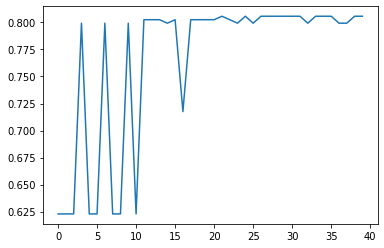

In [67]:
plt.plot(score_train)

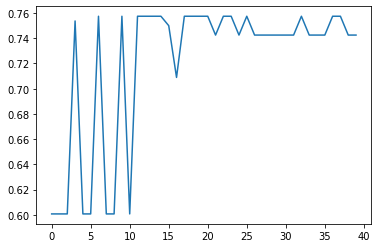

In [48]:
plt.plot(score_validation)

In [37]:
score_train = slp.score(x_train, y_train)
score_test = slp.score(x_test, y_test)

print('Accuracy Score (validation): {0:.3f}'.format(score_test))
print('Accuracy Score (training): {0:.3f}'.format(score_train))

Accuracy Score (validation): 0.601
Accuracy Score (training): 0.623
